In [7]:
import pandas as pd

In [1]:
import pickle

file_path = '/Volumes/harris/somnotate/to_score_set/pickle_eeg_signal/eeg_data_sub-010_ses-01_recording-01_filtered_0-50Hz.pkl'

file = open(file_path, 'rb')
        
eeg_data = pickle.load(file)


/var/folders/sy/1pj77pp55jgbyxgsst2fw9rr0000gn/T/ipykernel_58859/1229203249.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  eeg_data = pickle.load(file)


In [2]:
import pandas as pd
sleep_df = pd.read_csv('/Volumes/harris/somnotate/to_score_set/vis_back_to_csv/automated_state_annotationoutput_sub-010_ses-01_recording-01_time-0-69h_50Hz.csv')

In [8]:
file_path_raw = '/Volumes/harris/somnotate/to_score_set/pickle_eeg_signal/eeg_data_sub-010_ses-01_recording-01.pkl'

file = open(file_path, 'rb')
        
eeg_data_raw = pickle.load(file)

/var/folders/sy/1pj77pp55jgbyxgsst2fw9rr0000gn/T/ipykernel_58859/4101583901.py:5: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  eeg_data_raw = pickle.load(file)


In [15]:
import numpy as np

def verify_filtering(eeg_data, filtered_data, fs=512, channel='EEG1'):
    """
    Visualize filtering effects in time and frequency domain
    """
    from scipy.fft import fft, fftfreq
    import matplotlib.pyplot as plt
    
    # Get sample of data (first 10 seconds)
    n_samples = 10 * fs
    time = np.arange(n_samples) / fs
    orig_signal = eeg_data[channel][:n_samples]
    filt_signal = filtered_data[channel][:n_samples]
    
    # Compute FFT
    freq_orig = fftfreq(n_samples, 1/fs)[:n_samples//2]
    fft_orig = 2.0/n_samples * np.abs(fft(orig_signal)[:n_samples//2])
    fft_filt = 2.0/n_samples * np.abs(fft(filt_signal)[:n_samples//2])
    
    # Plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
    
    # Time domain
    ax1.plot(time, orig_signal, 'b', label='Original')
    ax1.set_title('Original Signal (Time Domain)')
    ax1.set_xlabel('Time (s)')
    
    ax2.plot(time, filt_signal, 'r', label='Filtered')
    ax2.set_title('Filtered Signal (Time Domain)')
    ax2.set_xlabel('Time (s)')
    
    # Frequency domain
    ax3.plot(freq_orig, fft_orig, 'b')
    ax3.set_title('Original Signal (Frequency Domain)')
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_xlim(0, 100)
    
    ax4.plot(freq_orig, fft_filt, 'r')
    ax4.set_title('Filtered Signal (Frequency Domain)')
    ax4.set_xlabel('Frequency (Hz)')
    ax4.set_xlim(0, 100)
    
    plt.tight_layout()
    plt.show()
    

verify_filtering(eeg_data_raw, eeg_data)

KeyError: 'ALIGNED'

In [16]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

def verify_filtering(eeg_data_raw, eeg_data, fs_raw=512, fs_filtered=50, channel='EEG1'):
    """
    Visualize filtering effects in time and frequency domain
    """
    if channel not in eeg_data_raw.columns or channel not in eeg_data.columns:
        raise KeyError(f"Channel '{channel}' not found in data.")
    
    # Get sample of data (first 10 seconds)
    n_samples_raw = 10 * fs_raw
    n_samples_filtered = 10 * fs_filtered
    time_raw = np.arange(n_samples_raw) / fs_raw
    time_filtered = np.arange(n_samples_filtered) / fs_filtered
    orig_signal = eeg_data_raw[channel][:n_samples_raw]
    filt_signal = eeg_data[channel][:n_samples_filtered]
    
    # Compute FFT
    freq_orig = fftfreq(n_samples_raw, 1/fs_raw)[:n_samples_raw//2]
    fft_orig = 2.0/n_samples_raw * np.abs(fft(orig_signal)[:n_samples_raw//2])
    freq_filt = fftfreq(n_samples_filtered, 1/fs_filtered)[:n_samples_filtered//2]
    fft_filt = 2.0/n_samples_filtered * np.abs(fft(filt_signal)[:n_samples_filtered//2])
    
    # Plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
    
    # Time domain
    ax1.plot(time_raw, orig_signal, 'b', label='Original')
    ax1.set_title('Original Signal (Time Domain)')
    ax1.set_xlabel('Time (s)')
    
    ax2.plot(time_filtered, filt_signal, 'r', label='Filtered')
    ax2.set_title('Filtered Signal (Time Domain)')
    ax2.set_xlabel('Time (s)')
    
    # Frequency domain
    ax3.plot(freq_orig, fft_orig, 'b')
    ax3.set_title('Original Signal (Frequency Domain)')
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_xlim(0, 100)
    
    ax4.plot(freq_filt, fft_filt, 'r')
    ax4.set_title('Filtered Signal (Frequency Domain)')
    ax4.set_xlabel('Frequency (Hz)')
    ax4.set_xlim(0, 100)
    
    plt.tight_layout()
    plt.show()

# Call the function with the loaded data
verify_filtering(eeg_data_raw, eeg_data)

KeyError: 'ALIGNED'

In [17]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

def verify_filtering(eeg_data_raw, eeg_data, fs_raw=512, fs_filtered=50, channel='EEG1'):
    """
    Visualize filtering effects in time and frequency domain
    """
    if channel not in eeg_data_raw.columns or channel not in eeg_data.columns:
        raise KeyError(f"Channel '{channel}' not found in data.")
    
    # Get sample of data (first 10 seconds)
    n_samples_raw = 10 * fs_raw
    n_samples_filtered = 10 * fs_filtered
    time_raw = np.arange(n_samples_raw) / fs_raw
    time_filtered = np.arange(n_samples_filtered) / fs_filtered
    orig_signal = eeg_data_raw[channel][:n_samples_raw]
    filt_signal = eeg_data[channel][:n_samples_filtered]
    
    # Compute FFT
    freq_orig = fftfreq(n_samples_raw, 1/fs_raw)[:n_samples_raw//2]
    fft_orig = 2.0/n_samples_raw * np.abs(fft(orig_signal)[:n_samples_raw//2])
    freq_filt = fftfreq(n_samples_filtered, 1/fs_filtered)[:n_samples_filtered//2]
    fft_filt = 2.0/n_samples_filtered * np.abs(fft(filt_signal)[:n_samples_filtered//2])
    
    # Plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
    
    # Time domain
    ax1.plot(time_raw, orig_signal, 'b', label='Original')
    ax1.set_title('Original Signal (Time Domain)')
    ax1.set_xlabel('Time (s)')
    
    ax2.plot(time_filtered, filt_signal, 'r', label='Filtered')
    ax2.set_title('Filtered Signal (Time Domain)')
    ax2.set_xlabel('Time (s)')
    
    # Frequency domain
    ax3.plot(freq_orig, fft_orig, 'b')
    ax3.set_title('Original Signal (Frequency Domain)')
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_xlim(0, 100)
    
    ax4.plot(freq_filt, fft_filt, 'r')
    ax4.set_title('Filtered Signal (Frequency Domain)')
    ax4.set_xlabel('Frequency (Hz)')
    ax4.set_xlim(0, 100)
    
    plt.tight_layout()
    plt.show()

# Call the function with the loaded data
verify_filtering(eeg_data_raw, eeg_data)

KeyError: 'ALIGNED'

In [18]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

def verify_filtering(eeg_data_raw, eeg_data, fs_raw=512, fs_filtered=50, channel='EEG1'):
    """
    Visualize filtering effects in time and frequency domain
    """
    if channel not in eeg_data_raw.columns or channel not in eeg_data.columns:
        raise KeyError(f"Channel '{channel}' not found in data.")
    
    # Get sample of data (first 10 seconds)
    n_samples_raw = 10 * fs_raw
    n_samples_filtered = 10 * fs_filtered
    time_raw = np.arange(n_samples_raw) / fs_raw
    time_filtered = np.arange(n_samples_filtered) / fs_filtered
    orig_signal = eeg_data_raw[channel][:n_samples_raw]
    filt_signal = eeg_data[channel][:n_samples_filtered]
    
    # Debugging: Print shapes and first few values
    print(f"Original signal shape: {orig_signal.shape}")
    print(f"Filtered signal shape: {filt_signal.shape}")
    print(f"Original signal first 5 values: {orig_signal[:5]}")
    print(f"Filtered signal first 5 values: {filt_signal[:5]}")
    
    # Compute FFT
    freq_orig = fftfreq(n_samples_raw, 1/fs_raw)[:n_samples_raw//2]
    fft_orig = 2.0/n_samples_raw * np.abs(fft(orig_signal)[:n_samples_raw//2])
    freq_filt = fftfreq(n_samples_filtered, 1/fs_filtered)[:n_samples_filtered//2]
    fft_filt = 2.0/n_samples_filtered * np.abs(fft(filt_signal)[:n_samples_filtered//2])
    
    # Plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
    
    # Time domain
    ax1.plot(time_raw, orig_signal, 'b', label='Original')
    ax1.set_title('Original Signal (Time Domain)')
    ax1.set_xlabel('Time (s)')
    
    ax2.plot(time_filtered, filt_signal, 'r', label='Filtered')
    ax2.set_title('Filtered Signal (Time Domain)')
    ax2.set_xlabel('Time (s)')
    
    # Frequency domain
    ax3.plot(freq_orig, fft_orig, 'b')
    ax3.set_title('Original Signal (Frequency Domain)')
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_xlim(0, 100)
    
    ax4.plot(freq_filt, fft_filt, 'r')
    ax4.set_title('Filtered Signal (Frequency Domain)')
    ax4.set_xlabel('Frequency (Hz)')
    ax4.set_xlim(0, 100)
    
    plt.tight_layout()
    plt.show()

# Call the function with the loaded data
verify_filtering(eeg_data_raw, eeg_data)

Original signal shape: (5120,)
Filtered signal shape: (500,)
Original signal first 5 values: 0    21.074603
1    23.728912
2    27.279544
3    32.045226
4    37.519971
Name: EEG1, dtype: float64
Filtered signal first 5 values: 0    21.074603
1    23.728912
2    27.279544
3    32.045226
4    37.519971
Name: EEG1, dtype: float64


KeyError: 'ALIGNED'

In [19]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.signal import resample

def verify_filtering(eeg_data_raw, eeg_data, fs_raw=512, fs_filtered=50, channel='EEG1'):
    """
    Visualize filtering effects in time and frequency domain
    """
    if channel not in eeg_data_raw.columns or channel not in eeg_data.columns:
        raise KeyError(f"Channel '{channel}' not found in data.")
    
    # Get sample of data (first 10 seconds)
    n_samples_raw = 10 * fs_raw
    n_samples_filtered = 10 * fs_filtered
    time_raw = np.arange(n_samples_raw) / fs_raw
    time_filtered = np.arange(n_samples_filtered) / fs_filtered
    orig_signal = eeg_data_raw[channel][:n_samples_raw]
    filt_signal = eeg_data[channel][:n_samples_filtered]
    
    # Resample filtered signal to match original signal's sampling rate
    filt_signal_resampled = resample(filt_signal, n_samples_raw)
    
    # Debugging: Print shapes and first few values
    print(f"Original signal shape: {orig_signal.shape}")
    print(f"Filtered signal shape: {filt_signal.shape}")
    print(f"Resampled filtered signal shape: {filt_signal_resampled.shape}")
    print(f"Original signal first 5 values: {orig_signal[:5]}")
    print(f"Filtered signal first 5 values: {filt_signal[:5]}")
    print(f"Resampled filtered signal first 5 values: {filt_signal_resampled[:5]}")
    
    # Compute FFT
    freq_orig = fftfreq(n_samples_raw, 1/fs_raw)[:n_samples_raw//2]
    fft_orig = 2.0/n_samples_raw * np.abs(fft(orig_signal)[:n_samples_raw//2])
    fft_filt = 2.0/n_samples_raw * np.abs(fft(filt_signal_resampled)[:n_samples_raw//2])
    
    # Plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
    
    # Time domain
    ax1.plot(time_raw, orig_signal, 'b', label='Original')
    ax1.set_title('Original Signal (Time Domain)')
    ax1.set_xlabel('Time (s)')
    
    ax2.plot(time_raw, filt_signal_resampled, 'r', label='Filtered')
    ax2.set_title('Filtered Signal (Time Domain)')
    ax2.set_xlabel('Time (s)')
    
    # Frequency domain
    ax3.plot(freq_orig, fft_orig, 'b')
    ax3.set_title('Original Signal (Frequency Domain)')
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_xlim(0, 100)
    
    ax4.plot(freq_orig, fft_filt, 'r')
    ax4.set_title('Filtered Signal (Frequency Domain)')
    ax4.set_xlabel('Frequency (Hz)')
    ax4.set_xlim(0, 100)
    
    plt.tight_layout()
    plt.show()

# Call the function with the loaded data
verify_filtering(eeg_data_raw, eeg_data)

Original signal shape: (5120,)
Filtered signal shape: (500,)
Resampled filtered signal shape: (5120,)
Original signal first 5 values: 0    21.074603
1    23.728912
2    27.279544
3    32.045226
4    37.519971
Name: EEG1, dtype: float64
Filtered signal first 5 values: 0    21.074603
1    23.728912
2    27.279544
3    32.045226
4    37.519971
Name: EEG1, dtype: float64
Resampled filtered signal first 5 values: [21.07460278 26.989243   31.3354757  34.11669483 35.41866923]


KeyError: 'ALIGNED'

In [21]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.signal import resample

def verify_filtering(eeg_data_raw, eeg_data, fs_raw=512, fs_filtered=50, channel='EEG1'):
    """
    Visualize filtering effects in time and frequency domain
    """
    if channel not in eeg_data_raw.columns or channel not in eeg_data.columns:
        raise KeyError(f"Channel '{channel}' not found in data.")
    
    # Get sample of data (first 10 seconds)
    n_samples_raw = 10 * fs_raw
    n_samples_filtered = 10 * fs_filtered
    time_raw = np.arange(n_samples_raw) / fs_raw
    time_filtered = np.arange(n_samples_filtered) / fs_filtered
    orig_signal = eeg_data_raw[channel][:n_samples_raw]
    filt_signal = eeg_data[channel][:n_samples_filtered]
    
    # Resample filtered signal to match original signal's sampling rate
    filt_signal_resampled = resample(filt_signal, n_samples_raw)
    
    # Debugging: Print shapes and first few values
    print(f"Original signal shape: {orig_signal.shape}")
    print(f"Filtered signal shape: {filt_signal.shape}")
    print(f"Resampled filtered signal shape: {filt_signal_resampled.shape}")
    print(f"Original signal first 5 values: {orig_signal[:5]}")
    print(f"Filtered signal first 5 values: {filt_signal[:5]}")
    print(f"Resampled filtered signal first 5 values: {filt_signal_resampled[:5]}")
    
    # Compute FFT
    try:
        freq_orig = fftfreq(n_samples_raw, 1/fs_raw)[:n_samples_raw//2]
        fft_orig = 2.0/n_samples_raw * np.abs(fft(orig_signal)[:n_samples_raw//2])
        freq_filt = fftfreq(n_samples_raw, 1/fs_raw)[:n_samples_raw//2]
        fft_filt = 2.0/n_samples_raw * np.abs(fft(filt_signal_resampled)[:n_samples_raw//2])
    except Exception as e:
        print(f"Error computing FFT: {e}")
        return
    
    # Plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
    
    # Time domain
    ax1.plot(time_raw, orig_signal, 'b', label='Original')
    ax1.set_title('Original Signal (Time Domain)')
    ax1.set_xlabel('Time (s)')
    
    ax2.plot(time_raw, filt_signal_resampled, 'r', label='Filtered')
    ax2.set_title('Filtered Signal (Time Domain)')
    ax2.set_xlabel('Time (s)')
    
    # Frequency domain
    ax3.plot(freq_orig, fft_orig, 'b')
    ax3.set_title('Original Signal (Frequency Domain)')
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_xlim(0, 100)
    
    ax4.plot(freq_filt, fft_filt, 'r')
    ax4.set_title('Filtered Signal (Frequency Domain)')
    ax4.set_xlabel('Frequency (Hz)')
    ax4.set_xlim(0, 100)
    
    plt.tight_layout()
    plt.show()

# Call the function with the loaded data
verify_filtering(eeg_data_raw, eeg_data)

Original signal shape: (5120,)
Filtered signal shape: (500,)
Resampled filtered signal shape: (5120,)
Original signal first 5 values: 0    21.074603
1    23.728912
2    27.279544
3    32.045226
4    37.519971
Name: EEG1, dtype: float64
Filtered signal first 5 values: 0    21.074603
1    23.728912
2    27.279544
3    32.045226
4    37.519971
Name: EEG1, dtype: float64
Resampled filtered signal first 5 values: [21.07460278 26.989243   31.3354757  34.11669483 35.41866923]
Error computing FFT: 'ALIGNED'


Original signal shape: (5120,), dtype: float64
Filtered signal shape: (500,), dtype: float64
Resampled filtered signal shape: (5120,), dtype: float64
Original signal first 5 values: 0    21.074603
1    23.728912
2    27.279544
3    32.045226
4    37.519971
Name: EEG1, dtype: float64
Filtered signal first 5 values: 0    21.074603
1    23.728912
2    27.279544
3    32.045226
4    37.519971
Name: EEG1, dtype: float64
Resampled filtered signal first 5 values: [21.07460278 26.989243   31.3354757  34.11669483 35.41866923]


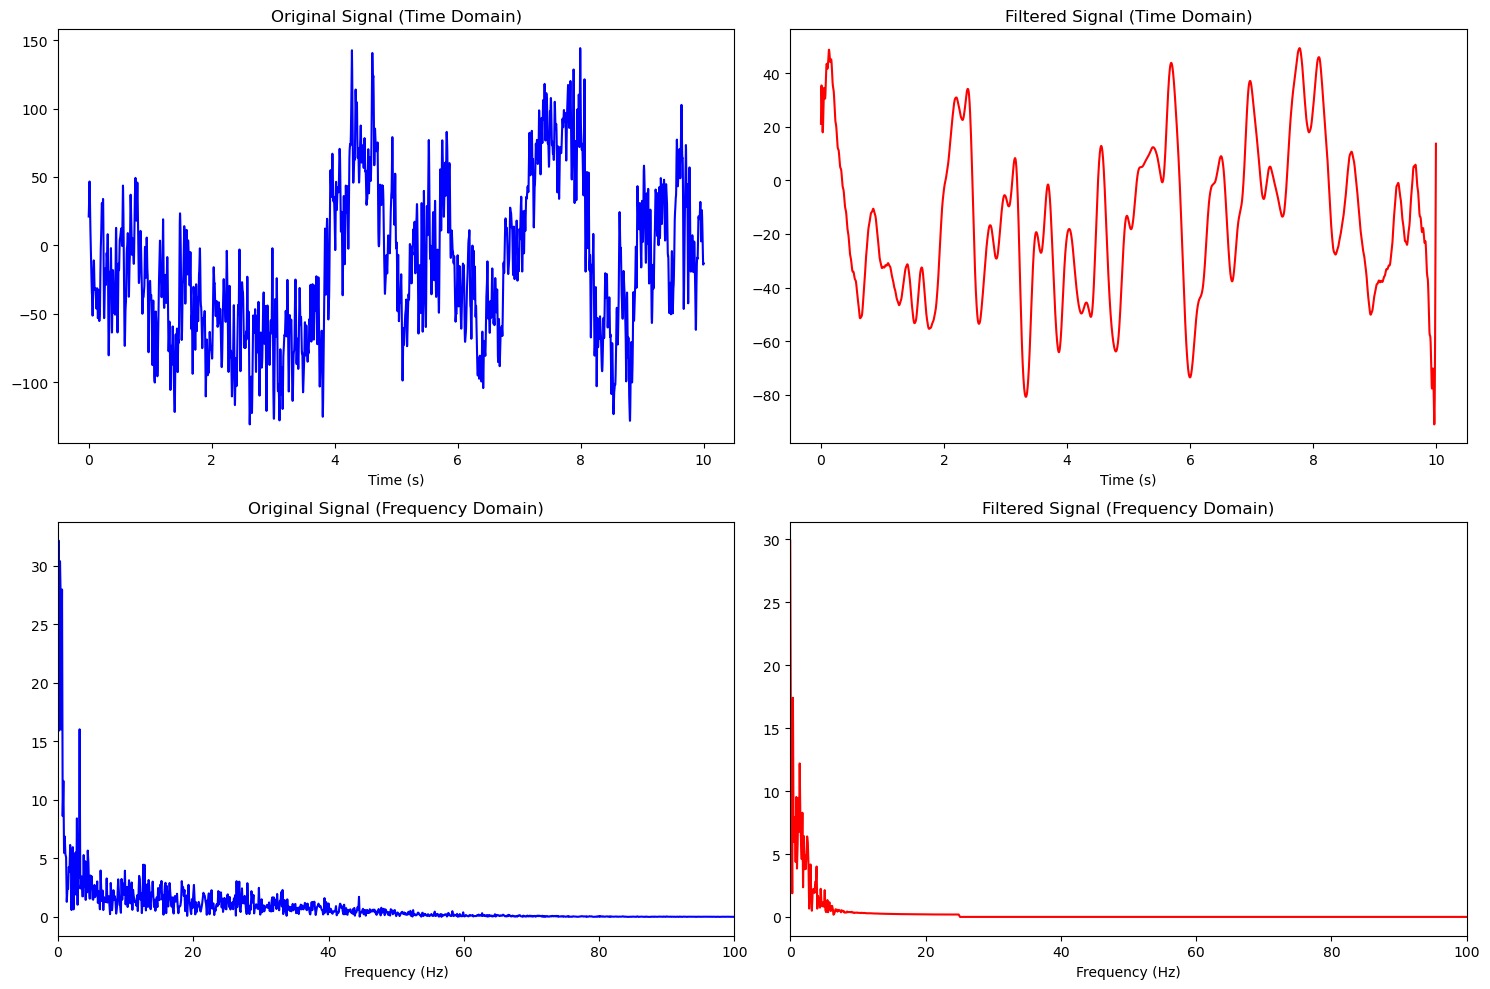

In [22]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.signal import resample

def verify_filtering(eeg_data_raw, eeg_data, fs_raw=512, fs_filtered=50, channel='EEG1'):
    """
    Visualize filtering effects in time and frequency domain
    """
    if channel not in eeg_data_raw.columns or channel not in eeg_data.columns:
        raise KeyError(f"Channel '{channel}' not found in data.")
    
    # Get sample of data (first 10 seconds)
    n_samples_raw = 10 * fs_raw
    n_samples_filtered = 10 * fs_filtered
    time_raw = np.arange(n_samples_raw) / fs_raw
    time_filtered = np.arange(n_samples_filtered) / fs_filtered
    orig_signal = eeg_data_raw[channel][:n_samples_raw]
    filt_signal = eeg_data[channel][:n_samples_filtered]
    
    # Resample filtered signal to match original signal's sampling rate
    filt_signal_resampled = resample(filt_signal, n_samples_raw)
    
    # Debugging: Print shapes, types, and first few values
    print(f"Original signal shape: {orig_signal.shape}, dtype: {orig_signal.dtype}")
    print(f"Filtered signal shape: {filt_signal.shape}, dtype: {filt_signal.dtype}")
    print(f"Resampled filtered signal shape: {filt_signal_resampled.shape}, dtype: {filt_signal_resampled.dtype}")
    print(f"Original signal first 5 values: {orig_signal[:5]}")
    print(f"Filtered signal first 5 values: {filt_signal[:5]}")
    print(f"Resampled filtered signal first 5 values: {filt_signal_resampled[:5]}")
    
    # Ensure data is properly aligned and formatted
    orig_signal = np.ascontiguousarray(orig_signal)
    filt_signal_resampled = np.ascontiguousarray(filt_signal_resampled)
    
    # Compute FFT
    try:
        freq_orig = fftfreq(n_samples_raw, 1/fs_raw)[:n_samples_raw//2]
        fft_orig = 2.0/n_samples_raw * np.abs(fft(orig_signal)[:n_samples_raw//2])
        freq_filt = fftfreq(n_samples_raw, 1/fs_raw)[:n_samples_raw//2]
        fft_filt = 2.0/n_samples_raw * np.abs(fft(filt_signal_resampled)[:n_samples_raw//2])
    except Exception as e:
        print(f"Error computing FFT: {e}")
        return
    
    # Plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
    
    # Time domain
    ax1.plot(time_raw, orig_signal, 'b', label='Original')
    ax1.set_title('Original Signal (Time Domain)')
    ax1.set_xlabel('Time (s)')
    
    ax2.plot(time_raw, filt_signal_resampled, 'r', label='Filtered')
    ax2.set_title('Filtered Signal (Time Domain)')
    ax2.set_xlabel('Time (s)')
    
    # Frequency domain
    ax3.plot(freq_orig, fft_orig, 'b')
    ax3.set_title('Original Signal (Frequency Domain)')
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_xlim(0, 100)
    
    ax4.plot(freq_filt, fft_filt, 'r')
    ax4.set_title('Filtered Signal (Frequency Domain)')
    ax4.set_xlabel('Frequency (Hz)')
    ax4.set_xlim(0, 100)
    
    plt.tight_layout()
    plt.show()

# Call the function with the loaded data
verify_filtering(eeg_data_raw, eeg_data)

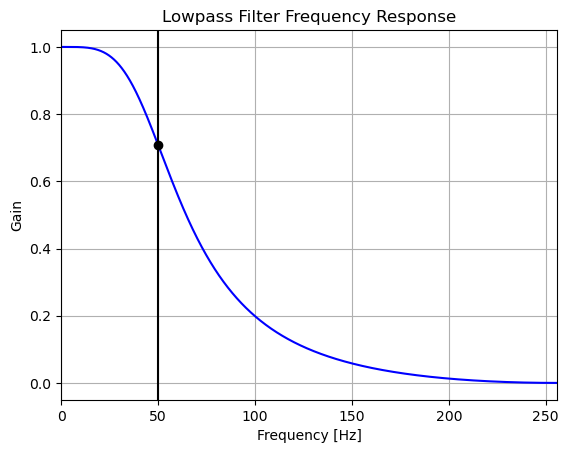

NameError: name 'eeg_data_raw' is not defined

In [1]:
import numpy as np
from scipy.signal import butter, filtfilt, freqz
import matplotlib.pyplot as plt

def design_lowpass_filter(cutoff, fs, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def plot_filter_response(b, a, fs):
    w, h = freqz(b, a, worN=8000)
    plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
    plt.plot(cutoff, 0.5 * np.sqrt(2), 'ko')
    plt.axvline(cutoff, color='k')
    plt.xlim(0, 0.5 * fs)
    plt.title("Lowpass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Gain')
    plt.grid()
    plt.show()

def plot_signal_spectrum(signal, fs, title):
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/fs)
    fft_signal = np.fft.fft(signal)
    plt.plot(freq[:n//2], 2.0/n * np.abs(fft_signal[:n//2]))
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Parameters
fs = 512  # Sampling frequency
cutoff = 50  # Cutoff frequency for lowpass filter
order = 2  # Filter order

# Design filter
b, a = design_lowpass_filter(cutoff, fs, order)

# Plot filter response
plot_filter_response(b, a, fs)

# Generate a sample signal (e.g., 5 Hz sine wave with noise)
signal = eeg_data_raw

# Plot original signal spectrum
plot_signal_spectrum(signal, fs, "Original Signal Spectrum")

# Apply lowpass filter
filtered_signal = filtfilt(b, a, signal)

# Plot filtered signal spectrum
plot_signal_spectrum(filtered_signal, fs, "Filtered Signal Spectrum")